Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

**Objectives**

- What are continuous and discrete variables? Using pandas built-in plotting functionality.
- Learn about various types of `pandas` plots using `matplotlib`
- use `matplotlib` to visualize distributions and relationships with continuous and discrete variables
- imitate a real-world example

In [94]:
## Imports.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**What is matplotlib?**   
http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/  
"Under the hood, pandas plots graphs with the matplotlib library. This is usually pretty convenient since it allows you to just .plot your graphs, but since matplotlib is kind of a train wreck pandas inherits that confusion."

## Continuous vs. discrete variables

In [95]:
# Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [96]:
# cabin class is a discrete variable
# it can be displayed using either number or string values.
df['cabin_class'] = df['Pclass'].map({1:'first', 2: 'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


In [97]:
# survival is a binary variable, which is a type of discrete var.
df['death_var']=df['Survived'].map({0:'died', 1: 'lived'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,death_var
0,0,3,male,22.0,7.2500,Southampton,third,died
1,1,1,female,38.0,71.2833,Cherbourg,first,lived
2,1,3,female,26.0,7.9250,Southampton,third,lived
3,1,1,female,35.0,53.1000,Southampton,first,lived
4,0,3,male,35.0,8.0500,Southampton,third,died


In [98]:
# Age is a continuous variable
df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [99]:
# A continuous variable can be converted to a discrete var using binning.
mybins=[0,19,29,39,80]
mylabels=['below 20', '20-29', '30-39', 'above 39']
df['age_groups']= pd.cut(df['Age'], bins=mybins, labels=mylabels)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,death_var,age_groups
0,0,3,male,22.0,7.2500,Southampton,third,died,20-29
1,1,1,female,38.0,71.2833,Cherbourg,first,lived,30-39
2,1,3,female,26.0,7.9250,Southampton,third,lived,20-29
3,1,1,female,35.0,53.1000,Southampton,first,lived,30-39
4,0,3,male,35.0,8.0500,Southampton,third,died,30-39


In [100]:
# display value counts
df['age_groups'].value_counts(normalize=True).sort_index()

below 20    0.230337
20-29       0.308989
30-39       0.233146
above 39    0.227528
Name: age_groups, dtype: float64

In [101]:
# Fare is also a continuous variable
df['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [102]:
# Remove extreme outliers
df=df[df['Fare']<500]

In [103]:
# Convert it to categorical
farebins=[0,8,15,33,512]
farelabels=['low', 'medium', 'high','vhigh']
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
df['fare_groups'].value_counts().sort_index()

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

**Display a single continuous variable**

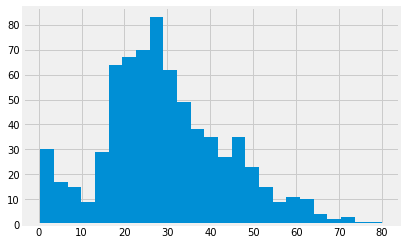

In [104]:
# Histogram
df['Age'].hist(bins=25);

**Display a single discrete variable**

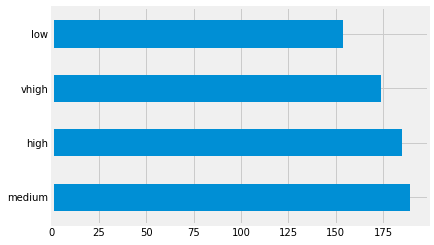

In [105]:
# Bar chart
df['fare_groups'].value_counts().plot(kind='barh');

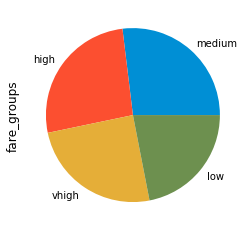

In [106]:
# Pie chart
df['fare_groups'].value_counts().plot(kind='pie');

**Compare two discrete variables**

In [107]:
# Compare two discrete variables using crosstab
cab_death = pd.crosstab(df['cabin_class'],df['death_var'])
cab_death

death_var,died,lived
cabin_class,,
first,64,117
second,90,83
third,270,85


In [108]:
# Crosstab with column percents.
cab_death1 = pd.crosstab(df['cabin_class'],df['death_var'], normalize='columns')
cab_death1

death_var,died,lived
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


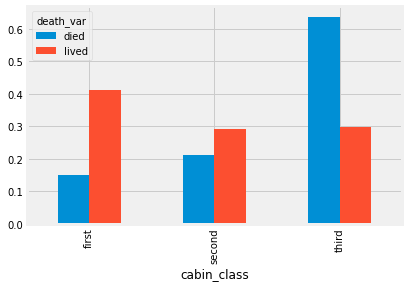

In [109]:
cab_death1.plot(kind='bar');

In [110]:
# Crosstab with column percents.
cab_death2 = pd.crosstab(df['cabin_class'],df['death_var'], normalize='index')
cab_death2

death_var,died,lived
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


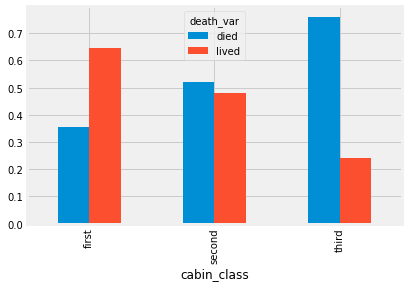

In [111]:
# Use pandas plotting to display that relationship.
cab_death2.plot(kind='bar');

**Compare a discrete and continuous variable**

In [112]:
# average Age
df['Age'].mean()

29.618011283497882

In [113]:
# Average age by cabin class
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

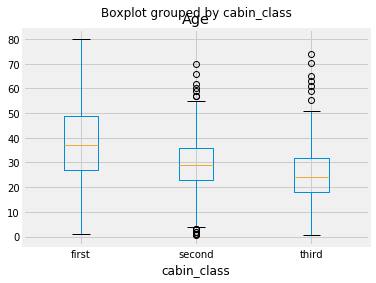

In [114]:
# Boxplot: age and cabin class
df.boxplot(column='Age', by='cabin_class');

**Compare two continuous variables**

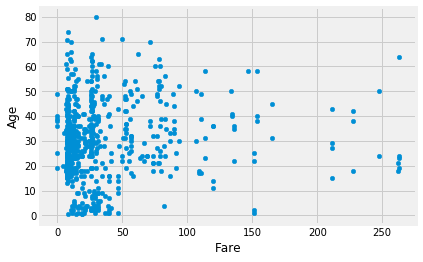

In [115]:
# scatter: age by fare
df.plot(kind = 'scatter', x='Fare', y='Age');

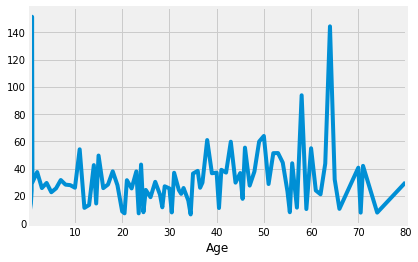

In [116]:
# line chart: age by fare
df.groupby('Age')['Fare'].mean().plot();

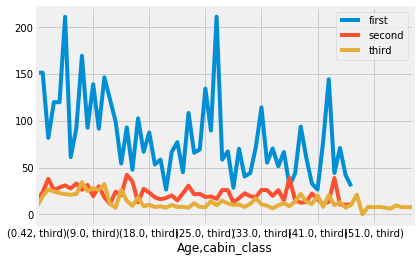

In [117]:
# Line chart: age by fare and cabin class
age_grouped.groupby('cabin_class').plot()
plt.legend();

**Compare three continuous variables**

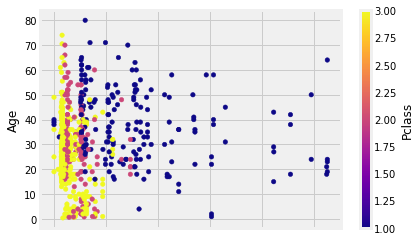

In [118]:
# scatter: age, fare, cabin class
df.plot(kind = 'scatter', x='Fare', y='Age', c='Pclass', colormap='plasma');

**Compare multiple continuous variables**

In [119]:
# Correlation Matrix
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


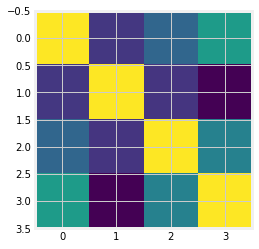

In [120]:
# Display as a heatmap
plt.imshow(corr_matrix);

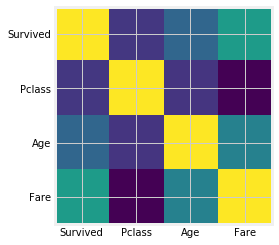

In [121]:
# add some labels
fig, axes = plt.subplots()
im = axes.imshow(corr_matrix)
# set the tick distance
axes.set_xticks(np.arange(len(corr_matrix)))
axes.set_yticks(np.arange(len(corr_matrix)))
# set the labels
axes.set_xticklabels(corr_matrix.index)
axes.set_yticklabels(corr_matrix.index)
# display
plt.show;

## Intro to `matplotlib`

## Imitate a real-world example

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [29]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

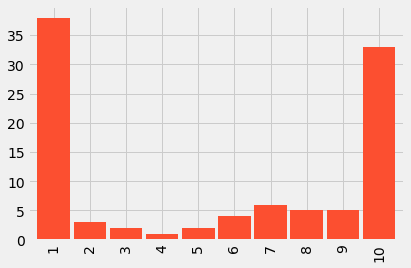

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

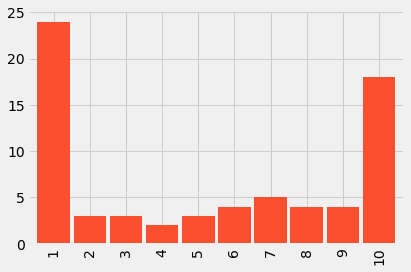

In [31]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

In [32]:
list(range(1,11,1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [33]:
fake

1     38
2      3
3      2
4      1
5      2
6      4
7      6
8      5
9      5
10    33
dtype: int64

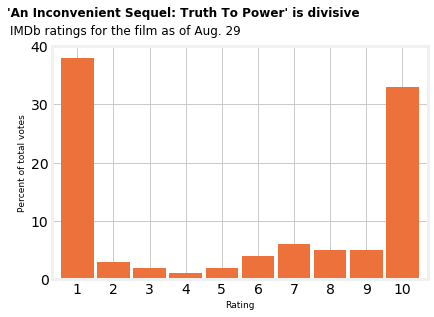

In [34]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")
# fig.suptitle('Test Title')

# Set the bars
# ax.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fake, width=0.9, color="#ED713A")
fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [35]:
display(example)

## Reproduce with real data

Using this dataset relies on us making two discoveries:

1) The dataset shows logs of the data at different timestamps and these timestamps are cumulative, meaning that it has all of the ratings as earlier timestamps, but with the new ones added on top. 2) The dataset logs ratings breakdowns for a bunch of different demographic groups per timestamp.

Once we realize these two things, we realize that we only really need 1 line of this dataset to make our graphic, it's the last line that holds the ratings for all IMDb users for the very last time stamp.

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [37]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [38]:
# Convert timestamps strings to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [39]:
# Use the timestamp as the unique index identifier 
# so that we can select rows by timestamp
df.set_index('timestamp', inplace=True)

In [40]:
# grab only the rows corresponding to the last day
lastday = df['2017-08-29']

In [41]:
# get the demographic breakdowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,...,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,...,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,...,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,...,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,...,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [42]:
# just grab the very last line (latest timestamp) of IMDb user ratings
# this should be the most up to date data from the dataset
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [43]:
# Grab only the percentage columns since we don't care about the raw 
# counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [44]:
# Reset the index so that it's numeric again
# and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


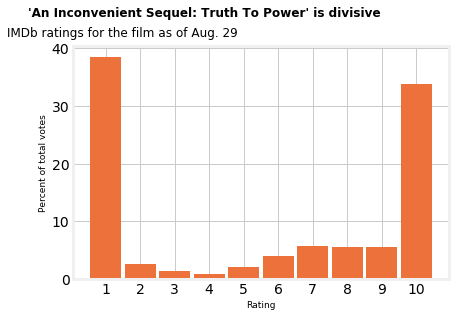

In [45]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));